In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from glob import glob
from matplotlib.ticker import MaxNLocator

## Meta configuration

In [2]:
title_font = 16
label_font = 16
legend_font = 9

## Figure 2 a & b: SME, SME with loosebounds, SME-UCB, LSE on Boeing 747

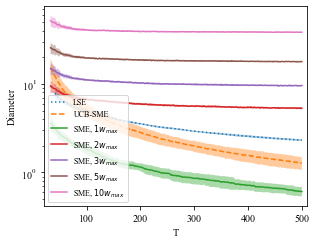

In [19]:


folder_name = 'ICML_camera_loose_gaussian'
disturbance = 'truncated_gaussian'
W = 2
start = 10
d = 16+8
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams["font.family"] = "Times New Roman"

###################### LSE ######################
LSE = []
paths = list(filter(
    lambda x: 'diam_LSE' not in x,
    glob(folder_name + '/LSE_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    LSE.append(data['diam_LSE'][data['diam_LSE'] != 0])

LSE = np.array(LSE)
LSE_mean = np.mean(LSE, axis=0)
LSE_std = np.std(LSE, axis=0)
t3 = np.nonzero(data['diam_LSE'])[0]

plt.semilogy(t3[start+d:], LSE_mean[start+d:], ':', label='LSE')
plt.fill_between(t3[start+d:], LSE_mean[start+d:] + LSE_std[start+d:], LSE_mean[start+d:] - LSE_std[start+d:],alpha=0.4)

###################### SME-UCB ######################
SME_UCB = []
paths = list(filter(
    lambda x: 'diam_SM' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SME_UCB.append(data['diam_SM'][data['diam_SM'] != 0])

SME_UCB = np.array(SME_UCB)
SME_UCB_mean = np.mean(SME_UCB, axis=0)
SME_UCB_std = np.std(SME_UCB, axis=0)
t1 = np.nonzero(data['diam_SM'])[0]

plt.semilogy(t1[start:], SME_UCB_mean[start:], '--', label='UCB-SME')
plt.fill_between(t1[start:], SME_UCB_mean[start:] + SME_UCB_std[start:], SME_UCB_mean[start:] - SME_UCB_std[start:],alpha=0.4)

###################### SME and SME-loose ######################
loose_wmax_list = [1, 2, 3, 5, 10]
SM_loose = {'1':[], '2':[], '3':[], '5':[], '10':[]}


for wmax in loose_wmax_list:
    paths = list(filter(
        lambda x: 'diam_SM' not in x,
        glob(folder_name + '/SM_diameter_'+ disturbance+'*_W=' + str(W*wmax) + '.0_*.pkl')))
    for i, path in enumerate(paths):
        with open(path, 'rb') as f:
            data = pickle.load(f)
        SM_loose[str(wmax)].append(data['diam_SM'][data['diam_SM'] != 0])
        
    SME_loose_mean = np.mean(SM_loose[str(wmax)], axis=0)
    SME_loose_std = np.std(SM_loose[str(wmax)], axis=0)
    t2 = np.nonzero(data['diam_SM'])[0]

    plt.semilogy(t2[start:], SME_loose_mean[start:], label='SME, ${}w_{{max}}$'.format(wmax))
    plt.fill_between(t2[start:], SME_loose_mean[start:] + SME_loose_std[start:], SME_loose_mean[start:] - SME_loose_std[start:],alpha=0.4)


plt.rcParams['figure.figsize'] = [4.5, 3.5]
plt.legend(fontsize=8)
plt.xlim([20,510])
plt.xlabel('T')
plt.ylabel('Diameter')
plt.tight_layout()

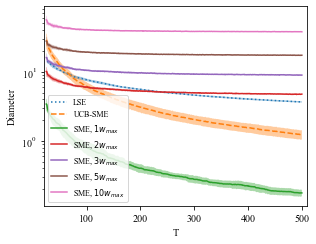

In [20]:
folder_name = 'ICML_camera_loose_uniform'
disturbance = 'uniform'
W = 2
start = 2
d=18
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.figsize'] = [4.5, 3.5]

###################### LSE ######################
LSE = []
paths = list(filter(
    lambda x: 'diam_LSE' not in x,
    glob(folder_name + '/LSE_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    LSE.append(data['diam_LSE'][data['diam_LSE'] != 0])

LSE = np.array(LSE)
LSE_mean = np.mean(LSE, axis=0)
LSE_std = np.std(LSE, axis=0)
t3 = np.nonzero(data['diam_LSE'])[0]

plt.semilogy(t3[start+d:], LSE_mean[start+d:], ':', label='LSE')
plt.fill_between(t3[start+d:], LSE_mean[start+d:] + LSE_std[start+d:], LSE_mean[start+d:] - LSE_std[start+d:],alpha=0.4)


###################### SME-UCB ######################
SME_UCB = []
paths = list(filter(
    lambda x: 'diam_SM' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SME_UCB.append(data['diam_SM'][data['diam_SM'] != 0])

SME_UCB = np.array(SME_UCB)
SME_UCB_mean = np.mean(SME_UCB, axis=0)
SME_UCB_std = np.std(SME_UCB, axis=0)
t1 = np.nonzero(data['diam_SM'])[0]

plt.semilogy(t1[start:], SME_UCB_mean[start:], '--', label='UCB-SME')
plt.fill_between(t1[start:], SME_UCB_mean[start:] + SME_UCB_std[start:], SME_UCB_mean[start:] - SME_UCB_std[start:],alpha=0.4)

###################### SME and SME-loose ######################
loose_wmax_list = [1, 2, 3, 5, 10]
SM_loose = {'1':[], '2':[], '3':[], '5':[], '10':[]}


for wmax in loose_wmax_list:
    paths = list(filter(
        lambda x: 'diam_SM' not in x,
        glob(folder_name + '/SM_diameter_'+ disturbance+'*_W=' + str(W*wmax) + '.0_*.pkl')))
    for i, path in enumerate(paths):
        with open(path, 'rb') as f:
            data = pickle.load(f)
        SM_loose[str(wmax)].append(data['diam_SM'][data['diam_SM'] != 0])
        
    SME_loose_mean = np.mean(SM_loose[str(wmax)], axis=0)
    SME_loose_std = np.std(SM_loose[str(wmax)], axis=0)
    t2 = np.nonzero(data['diam_SM'])[0]

    plt.semilogy(t2[start:], SME_loose_mean[start:], label='SME, ${}w_{{max}}$'.format(wmax))
    plt.fill_between(t2[start:], SME_loose_mean[start:] + SME_loose_std[start:], SME_loose_mean[start:] - SME_loose_std[start:],alpha=0.4)


plt.legend( fontsize="8", loc='lower left')
plt.xlabel('T')
plt.ylabel('Diameter')
plt.xlim([20,510])
plt.tight_layout()

## Figure 2 c: w_max learning on Boeing 747

<Figure size 360x504 with 0 Axes>

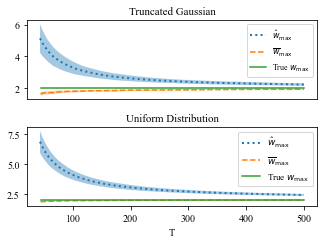

In [16]:
W = 2
Nx = 4
Nz = 6
T = 500
start = 20
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams['figure.figsize'] = [4.5, 3.5]
f, (a0, a1,) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]})
f.canvas.draw()

###################### w_learning: Gaussian ######################
folder_name = 'ICML_camera_loose_gaussian'
disturbance = 'truncated_gaussian'
w_hat = []
w_bar = []
paths = list(filter(
    lambda x: 'w_hat' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    w_hat.append(data['w_hat'][data['diam_SM'] !=0])
    w_bar_recover = data['w_hat'][1:] - (Nx**1.5 * Nz**2)/np.arange(1,T+1) * np.max(np.array(data['x'])) * 0.01
    w_bar.append(w_bar_recover[np.nonzero(data['diam_SM'])[0][0]:])

w_hat = np.array(w_hat)
w_hat_mean = np.mean(w_hat, axis=0)
w_hat_std = np.std(w_hat, axis=0)

w_bar = np.array(w_bar)
w_bar_mean = np.mean(w_bar, axis=0)
w_bar_std = np.std(w_bar, axis=0)

t1 = np.nonzero(data['diam_SM'])[0]

a0.plot(t1[start:], w_hat_mean[start:], ':', label='$\hat{w}_{{\max}}$', linewidth=2)
a0.fill_between(t1[start:], w_hat_mean[start:] + w_hat_std[start:], w_hat_mean[start:] - w_hat_std[start:],alpha=0.4)

a0.plot(t1[start+1:], w_bar_mean[start:], '--', label='$\overline{w}_{{\max}}$')
a0.fill_between(t1[start+1:], w_bar_mean[start:] + w_bar_std[start:], w_bar_mean[start:] - w_bar_std[start:],alpha=0.4)

a0.plot(t1[start+1:], np.ones_like(t1[start+1:])*W, label = 'True $w_{\max}$')
a0.legend(fontsize=8, loc='upper right')
a0.set_xticks([])
a0.set_xticks([], minor=True)
a0.set_title('Truncated Gaussian',fontsize=11)

###################### w_learning: Gaussian ######################
folder_name = 'ICML_camera_loose_uniform'
disturbance = 'uniform'
w_hat = []
w_bar = []
paths = list(filter(
    lambda x: 'w_hat' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    w_hat.append(data['w_hat'][data['diam_SM'] !=0])
    w_bar_recover = data['w_hat'][1:] - (Nx**1.5 * Nz**2)/np.arange(1,T+1) * np.max(np.array(data['x'])) * 0.01
    w_bar.append(w_bar_recover[np.nonzero(data['diam_SM'])[0][0]:])

w_hat = np.array(w_hat)
w_hat_mean = np.mean(w_hat, axis=0)
w_hat_std = np.std(w_hat, axis=0)

w_bar = np.array(w_bar)
w_bar_mean = np.mean(w_bar, axis=0)
w_bar_std = np.std(w_bar, axis=0)

t1 = np.nonzero(data['diam_SM'])[0]

a1.plot(t1[start:], w_hat_mean[start:], ':', label='$\hat{w}_{{\max}}$', linewidth=2)
a1.fill_between(t1[start:], w_hat_mean[start:] + w_hat_std[start:], w_hat_mean[start:] - w_hat_std[start:],alpha=0.4)

a1.plot(t1[start+1:], w_bar_mean[start:], '--', label='$\overline{w}_{{\max}}$')
a1.fill_between(t1[start+1:], w_bar_mean[start:] + w_bar_std[start:], w_bar_mean[start:] - w_bar_std[start:],alpha=0.4)

a1.plot(t1[start+1:], np.ones_like(t1[start+1:])*W, label = 'True $w_{\max}$')
a1.legend(fontsize=legend_font, loc='upper right')
a1.set_title('Uniform Distribution',fontsize=11)

a1.set_xlabel('T')
plt.tight_layout()


<Figure size 360x504 with 0 Axes>

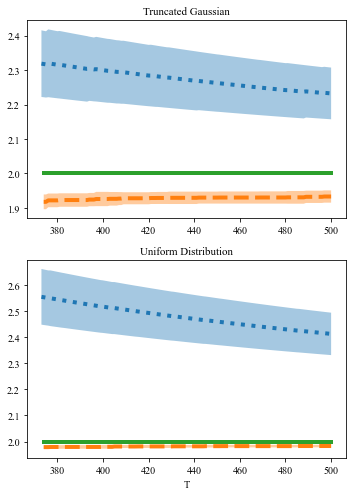

In [15]:
#zoomed in view

W = 2
Nx = 4
Nz = 6
T = 500
start = 350
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.figsize'] = [5, 7]
f, (a0, a1,) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]})
f.canvas.draw()

###################### w_learning: Gaussian ######################
folder_name = 'ICML_camera_loose_gaussian'
disturbance = 'truncated_gaussian'
w_hat = []
w_bar = []
paths = list(filter(
    lambda x: 'w_hat' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    w_hat.append(data['w_hat'][data['diam_SM'] !=0])
    w_bar_recover = data['w_hat'][1:] - (Nx**1.5 * Nz**2)/np.arange(1,T+1) * np.max(np.array(data['x'])) * 0.01
    w_bar.append(w_bar_recover[np.nonzero(data['diam_SM'])[0][0]:])

w_hat = np.array(w_hat)
w_hat_mean = np.mean(w_hat, axis=0)
w_hat_std = np.std(w_hat, axis=0)

w_bar = np.array(w_bar)
w_bar_mean = np.mean(w_bar, axis=0)
w_bar_std = np.std(w_bar, axis=0)

t1 = np.nonzero(data['diam_SM'])[0]

a0.plot(t1[start:], w_hat_mean[start:], ':', label='$\hat{w}_{{\max}}$', linewidth=4)
a0.fill_between(t1[start:], w_hat_mean[start:] + w_hat_std[start:], w_hat_mean[start:] - w_hat_std[start:],alpha=0.4)

a0.plot(t1[start+1:], w_bar_mean[start:], '--', label='$\overline{w}_{{\max}}$', linewidth=4)
a0.fill_between(t1[start+1:], w_bar_mean[start:] + w_bar_std[start:], w_bar_mean[start:] - w_bar_std[start:],alpha=0.4)

a0.plot(t1[start+1:], np.ones_like(t1[start+1:])*W, label = 'True $w_{\max}$', linewidth=4)
# a0.legend(fontsize=8, loc='upper right')
# a0.set_xticks([])
# a0.set_xticks([], minor=True)
a0.set_title('Truncated Gaussian',fontsize=11)

###################### w_learning: Gaussian ######################
folder_name = 'ICML_camera_loose_uniform'
disturbance = 'uniform'
w_hat = []
w_bar = []
paths = list(filter(
    lambda x: 'w_hat' not in x,
    glob(folder_name + '/SM-UCB_diameter_'+ disturbance+'*.pkl'))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    w_hat.append(data['w_hat'][data['diam_SM'] !=0])
    w_bar_recover = data['w_hat'][1:] - (Nx**1.5 * Nz**2)/np.arange(1,T+1) * np.max(np.array(data['x'])) * 0.01
    w_bar.append(w_bar_recover[np.nonzero(data['diam_SM'])[0][0]:])

w_hat = np.array(w_hat)
w_hat_mean = np.mean(w_hat, axis=0)
w_hat_std = np.std(w_hat, axis=0)

w_bar = np.array(w_bar)
w_bar_mean = np.mean(w_bar, axis=0)
w_bar_std = np.std(w_bar, axis=0)

t1 = np.nonzero(data['diam_SM'])[0]

a1.plot(t1[start:], w_hat_mean[start:], ':', label='$\hat{w}_{{\max}}$', linewidth=4)
a1.fill_between(t1[start:], w_hat_mean[start:] + w_hat_std[start:], w_hat_mean[start:] - w_hat_std[start:],alpha=0.4)

a1.plot(t1[start+1:], w_bar_mean[start:], '--', label='$\overline{w}_{{\max}}$' ,linewidth=4)
a1.fill_between(t1[start+1:], w_bar_mean[start:] + w_bar_std[start:], w_bar_mean[start:] - w_bar_std[start:],alpha=0.4)

a1.plot(t1[start+1:], np.ones_like(t1[start+1:])*W, label = 'True $w_{\max}$' ,linewidth=4)
# a1.legend(fontsize=8, loc='upper right')
a1.set_title('Uniform Distribution',fontsize=11)

a1.set_xlabel('T')
plt.tight_layout()


## Figure 3: Dimension scaling plot

<Figure size 600x350 with 0 Axes>

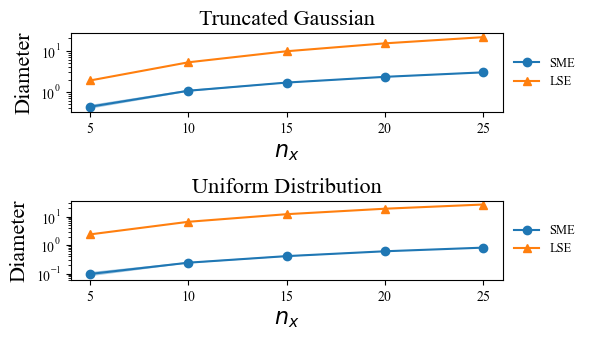

In [11]:


W = 2
Nx = 4
Nz = 6
T = 500
start = 20
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.figsize'] = [6, 3.5]
f, (a0, a1,) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]})
f.canvas.draw()


Nx_list = [5,10,15,20,25]

#################### Dimension: Truncated Gaussian ####################
folder_name = 'ICML_dimension_Gaussian_eig=0.9'
disturbance = 'truncated_gaussian'
trailing = '_*.pkl'

SM_list = []
SM_N_list = []

paths = list(filter(
    lambda x: 'diam_SM' not in x,
    glob(folder_name + '/SM_diameter_'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SM_list.append(data['diam_SM'][data['diam_SM'] != 0][-1])
    SM_N_list.append(data['specs']['Nx'])

LSE_list = []
LSE_N_list = []
paths = list(filter(
    lambda x: 'diam_LSE' not in x,
    glob(folder_name + '/LSE_diameter_'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    
    LSE_list.append(data['diam_LSE'][data['diam_LSE'] != 0][-1])
    LSE_N_list.append(data['specs']['Nx'])
    

SME_UCB_list = []
SME_UCB_N_list = []
paths = list(filter(
    lambda x: 'diam_SM' not in x,
    glob(folder_name + '/SM-UCB_*'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SME_UCB_list.append(data['diam_SM'])
    SME_UCB_N_list.append(data['specs']['Nx'])



SM_avg = [None] * len(Nx_list) 
SM_stdv =  [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(SM_N_list) if N == Nx]
    SM_avg[k] = np.sum(np.array([SM_list[ind] for ind in index])) / len(index)
    SM_stdv[k] = np.std(np.array([SM_list[ind] for ind in index]))
SM_stdv = np.array(SM_stdv)    
SM_avg = np.array(SM_avg)

LSE_avg = [None] * len(Nx_list)
LSE_stdv =  [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(LSE_N_list) if N == Nx]
    LSE_avg[k] = np.sum(np.array([LSE_list[ind] for ind in index])) / len(index)
    LSE_stdv[k] = np.std(np.array([LSE_list[ind] for ind in index]))
LSE_avg = np.array(LSE_avg)
LSE_stdv = np.array(LSE_stdv)

SME_UCB_avg = [None] * len(Nx_list)
SME_UCB_stdv = [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(SME_UCB_N_list) if N == Nx]
    SME_UCB_avg[k] = np.sum(np.array([SME_UCB_list[ind] for ind in index])) / len(index)
    SME_UCB_stdv[k] = np.std(np.array([SME_UCB_list[ind] for ind in index]))
SME_UCB_avg = np.array(SME_UCB_avg)
SME_UCB_stdv = np.array(SME_UCB_stdv)


a0.semilogy(Nx_list, SM_avg, '-o', label='SME')
a0.fill_between(Nx_list, SM_avg-SM_stdv, SM_avg+SM_stdv, alpha=0.4)

a0.semilogy(Nx_list, LSE_avg, '-^',label='LSE')
a0.fill_between(Nx_list, LSE_avg-LSE_stdv, LSE_avg+LSE_stdv, alpha=0.4)

a0.set_xlabel('$n_x$', fontsize=label_font)
a0.set_ylabel('Diameter', fontsize=label_font)
a0.set_title('Truncated Gaussian',fontsize=title_font)
a0.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False,fontsize=legend_font)
a0.xaxis.set_major_locator(MaxNLocator(integer=True))
a0.xaxis.set_ticks(np.arange(5, 25+1, 5))


#################### Dimension: Uniform ####################
folder_name = 'ICML_dimension_uniform_eig=0.9'
disturbance = 'uniform'
trailing = '_*.pkl'

SM_list = []
SM_N_list = []

paths = list(filter(
    lambda x: 'diam_SM' not in x,
    glob(folder_name + '/SM_diameter_'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SM_list.append(data['diam_SM'][data['diam_SM'] != 0][-1])
    SM_N_list.append(data['specs']['Nx'])

LSE_list = []
LSE_N_list = []
paths = list(filter(
    lambda x: 'diam_LSE' not in x,
    glob(folder_name + '/LSE_diameter_'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    
    LSE_list.append(data['diam_LSE'][data['diam_LSE'] != 0][-1])
    LSE_N_list.append(data['specs']['Nx'])
    

SME_UCB_list = []
SME_UCB_N_list = []
paths = list(filter(
    lambda x: 'diam_LSE' not in x,
    glob(folder_name + '/SM-UCB_*'+ disturbance + trailing))) # 
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    SME_UCB_list.append(data['diam_SM'])
    SME_UCB_N_list.append(data['specs']['Nx'])



SM_avg = [None] * len(Nx_list) 
SM_stdv =  [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(SM_N_list) if N == Nx]
    SM_avg[k] = np.sum(np.array([SM_list[ind] for ind in index])) / len(index)
    SM_stdv[k] = np.std(np.array([SM_list[ind] for ind in index]))
SM_stdv = np.array(SM_stdv)    
SM_avg = np.array(SM_avg)

LSE_avg = [None] * len(Nx_list)
LSE_stdv =  [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(LSE_N_list) if N == Nx]
    LSE_avg[k] = np.sum(np.array([LSE_list[ind] for ind in index])) / len(index)
    LSE_stdv[k] = np.std(np.array([LSE_list[ind] for ind in index]))
LSE_avg = np.array(LSE_avg)
LSE_stdv = np.array(LSE_stdv)

SME_UCB_avg = [None] * len(Nx_list)
SME_UCB_stdv = [None] * len(Nx_list) 
for k, Nx in enumerate(Nx_list):  
    index = [i for i, N in enumerate(SME_UCB_N_list) if N == Nx]
    SME_UCB_avg[k] = np.sum(np.array([SME_UCB_list[ind] for ind in index])) / len(index)
    SME_UCB_stdv[k] = np.std(np.array([SME_UCB_list[ind] for ind in index]))
SME_UCB_avg = np.array(SME_UCB_avg)
SME_UCB_stdv = np.array(SME_UCB_stdv)


h1 = a1.semilogy(Nx_list, SM_avg, '-o', label='SME')
a1.fill_between(Nx_list, SM_avg-SM_stdv, SM_avg+SM_stdv, alpha=0.4)

h2 = a1.semilogy(Nx_list, LSE_avg, '-^',label='LSE')
a1.fill_between(Nx_list, LSE_avg-LSE_stdv, LSE_avg+LSE_stdv, alpha=0.4)


a1.set_xlabel('$n_x$', fontsize=label_font)
a1.set_ylabel('Diameter', fontsize=label_font)
a1.set_title('Uniform Distribution',fontsize=title_font
)


a1.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=legend_font)
a1.xaxis.set_major_locator(MaxNLocator(integer=True))
a1.xaxis.set_ticks(np.arange(5, 25+1, 5))

plt.tight_layout()



